# PROJECT 02: PHÂN TÍCH DỮ LIỆU
- Lê Minh Hữu - 19120525
- Ninh Duy Huy - 19120533
- Cao Thanh Khiết - 19120544
- Nguyễn Tuấn Khoa - 19120547
- Trần Tuấn Kiệt - 19120557


## TIỀN XỬ LÝ DỮ LIỆU

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
playlists_df = pd.read_csv("data/playlists.csv", sep=",")
tracks_df = pd.read_csv("data/tracks.csv", sep=",")
users_df = pd.read_csv("data/users.csv", sep=",")

In [ ]:
print(playlists_df.shape)
print()
print(tracks_df.shape)
print()
print(users_df.shape)

(744, 3)

(12946, 45)

(451, 33)


In [ ]:
# delete some row with missing values more than the given ratio
def preprocess_data(old_df, ratio):
    attributes = list(old_df.columns)
    row = len(old_df.index)
    col = len(attributes)

    a = []
    arr=[]
    for i in range(row):
        for j in range(col):
            a.append(old_df[attributes[j]][i])
        arr.append(a)
        a = []

    result_arr = []
    temp_a = []
    for i in range(row):
        for j in range(col):
            temp_a.append(arr[i][j])
        result_arr.append(temp_a)
        temp_a = []
# xóa dòng
    for value in arr:
        count_missing = 0
        for i in value:
            if i == 'None' or i!=i :
                count_missing +=1
        if (count_missing / col) > ratio:
            result_arr.remove(value)
# xóa cột
    new_row = len(result_arr)
    temp_arr = []
    temp_a = []
    for i in range(new_row):
        for j in range(col):
            temp_a.append(result_arr[i][j])
        temp_arr.append(temp_a)
        temp_a = []

    count_del_col = 0 #biến đếm các cột đã bị xóa
    for i in range(col):
        count_missing = 0
        for j in range(new_row):
            if temp_arr[j][i] != temp_arr[j][i] or temp_arr[j][i] == 'None':
                count_missing += 1
        if (count_missing /new_row) > ratio:
            del attributes[i-count_del_col]
            for r in result_arr:
                del r[i-count_del_col]
            count_del_col += 1

    # tạo một DataFrame mới để lưu kết quả
    new_data = {}
    new_row = len(result_arr)
    for i in range(len(attributes)):
        new_data[attributes[i]] = [result_arr[j][i] for j in range(new_row)] 

    new_df = pd.DataFrame(new_data, columns = attributes)
    return new_df


In [ ]:
playlists_new = preprocess_data(playlists_df,0.5)
tracks_new = preprocess_data(tracks_df,0.5)
users_new = preprocess_data(users_df,0.5)

In [ ]:
# ghi dataframe ra file mới
playlists_new.to_csv('playlists_new.csv', index = False, header = True)
tracks_new.to_csv('tracks_new.csv', index = False, header = True)
users_new.to_csv('users_new.csv', index = False, header = True)

In [ ]:
print(playlists_new.shape)
print()
print(tracks_new.shape)
print()
print(users_new.shape)

(744, 3)

(6479, 38)

(222, 32)


1. Top 100 các tracks được download nhiều nhất vẽ biểu đồ histogram để thể hiện các tracks có số lượng download ở khoảng bao nhiêu chiếm đa số
   - Trước khi trả lời câu hỏi này ta sẽ xác định một số ý như sau
        - Các số liệu đã được xác định
        - Ứng dụng câu hỏi là tìm ra các tracks được ưa chuộng nhất
        - Câu hỏi có thể trả lời với dữ liệu có sẵn

In [ ]:
My_tracks = tracks_new

Ta cần tiền xử lý một vài dữ liệu bất hợp lý
- Bỏ đi những dòng có dữ liệu bất hợp lý đó là những dòng có downloadable là False nhưng dòng download_count vẫn có giá trị khác 0.0
- Loại bỏ đi những dòng có giá trị là 0.0 hay NaN trong cột download_count
- Loại bỏ đi những dòng trùng nhau và giữ lại dòng xuất hiện đầu tiên

In [ ]:
My_tracks = My_tracks[My_tracks['downloadable'] == True]
My_tracks = My_tracks[My_tracks['download_count'].isna() == False]
My_tracks = My_tracks[My_tracks['download_count'] != 0.0]

Tiếp theo ta sẽ sắp xếp lại theo thứ tự giảm dần rồi chọn 100 dòng đầu tiên

In [ ]:
My_df = My_tracks[['download_count', 'title']]
My_df = My_df.drop_duplicates(subset=['download_count', 'title'], keep='first')
My_df = My_df.sort_values(by='download_count', ascending=False)
My_df = My_df.head(100)
My_df

,download_count,title
265,179055.0,Janet Jackson - If (Kaytranada Remix)
2116,59269.0,Sylvan Esso - Hey Mami (Big Wild Remix)
5482,30271.0,Summer Mix | Best Of Kygo Mix 2021 | Best Of Tropical Deep House Music Chill Out 2021
2174,24819.0,MAX: THEME performed by HEALTH
5560,13505.0,Kygo Mix 2021 - Summer Mix 2021 - Best Deep & Tropical House Chill Out Dance Music Mix 2021
...,...,...
4549,416.0,Boom Bust: US susceptible to energy crisis & Twitch hit by major leak
5258,415.0,Going Underground: How much is Pakistan aiding the Taliban’s takeover of Afghanistan?
4613,414.0,"Going Underground: B.Johnson’s arrogant, response to Covid-19 was ‘social murder’– Prof. John Ashton"
5236,413.0,"Redacted Tonight: The real winner from the Afghanistan war, record breaking heat, Nabisco on strike"


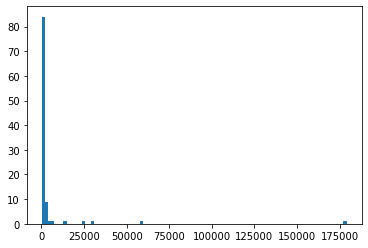

In [ ]:
plt.hist(My_df['download_count'], bins=100)
plt.show()

Nhận xét: số lượng download các tracks dao động trong khoang 400 đến 25000 chiếm đa số

2. Top 100 users có followers cao nhất và vẽ biểu đồ histogram để thể hiện các users có số lượng followers ở khoảng bao nhiêu chiếm đa số
   - Trước khi trả lời câu hỏi này ta sẽ xác định một số ý như sau
        - Các số liệu đã được xác định
        - Ứng dụng câu hỏi là tìm ra users nổi tiếng và có nhiều sản phẩm âm nhạc được ưa thích
        - Câu hỏi có thể trả lời với dữ liệu có sẵn

In [ ]:
My_users = users_new

Ta cần tiền xử lý một số dữ liệu bất hợp lý
- Loại bỏ các dòng trùng nhau và giữ lại dòng xuất hiện đầu tiên

In [ ]:
My_users = My_users[['followers_count', 'username']]
My_users = My_users.drop_duplicates(subset=['followers_count', 'username'], keep='first')

Tiếp theo ta sẽ sắp xếp lại theo thứ tự giảm dần rồi chọn 100 dòng đầu tiên

In [ ]:
My_users = My_users.sort_values(by='followers_count', ascending=False)
My_users = My_users.head(100)
My_users

,followers_count,username
39,6015140.0,Mad Decent
189,4224746.0,Major Lazer
52,2432110.0,☆LiL PEEP☆
119,1403191.0,On Being Studios
141,1292596.0,Audible
...,...,...
87,4671.0,Hiderway
114,4512.0,MP3 Hypnose Gratuit
33,4490.0,NOAX 2
63,4188.0,DJ TANTENGG


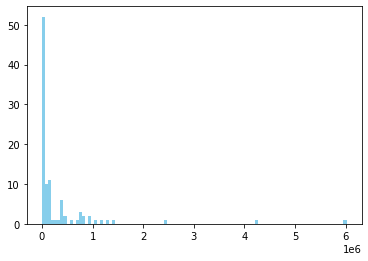

In [ ]:
plt.hist(My_users['followers_count'], bins=100, color = "skyblue")
plt.show()

Nhận xét: số lượng followers của các users dao động từ 4000 đến 1.000.000 chiếm đa số